In [1]:
#!pip install textblob

In [2]:
# Importing requests to extract content from a url
import requests   
# Beautifulsoup is for web scrapping...used to scrap specific content 
#from bs4 import BeautifulSoup as bs 
import re 
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob 

In [3]:
#!pip install textblob

In [4]:
def get_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(review)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [5]:
a = 'This was not a disgrace on the screen.  Not an utter waste of time.'

get_sentiment(a)

'negative'

## Vader Lexicon

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/geethikapanikker/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [8]:
sia = SentimentIntensityAnalyzer()
a = 'This was not a disgrace on the screen. Not An utter waste of time.'
sia.polarity_scores(a)


{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'compound': 0.6072}

In [9]:
def get_vader_sentiment(review): 
    ''' 
    Utility function to classify sentiment of passed tweet 
    using textblob's sentiment method 
    '''
    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [10]:
get_vader_sentiment(a)

'positive'

In [11]:
# creating empty reviews list 
movie_reviews=[]
#forest = ["the","king","of","jungle"]


ip=[]  
url="http://www.imdb.com/title/tt3521164/reviews?ref_=tt_urv"
#url="https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)
#url = "https://www.amazon.in/All-New-Kindle-reader-Glare-Free-Touchscreen/product-reviews/B0186FF45G/ref=cm_cr_getr_d_paging_btm_3?showViewpoints=1&pageNumber="
response = requests.get(url)
print(response.status_code)
# create soup object to iterate over the extracted content 
#soup = bs(response.content,"html.parser")


#print(soup)
# Extracting the content under specific tags  
reviews = soup.findAll("span",attrs={"class","a-size-base review-text-content"})
reviews = soup.findAll("div", attrs={"class","text"})
#for i in range(len(reviews)):
 # empty dictionary to store required params 
rev = [] 


for i in range(1,4):
    parsed_rev = {} 
    parsed_rev['rev_id'] = i
    #parsed_rev['blob_sentiment'] = get_vader_sentiment(reviews[i].text)
    parsed_rev['vader_sentiment'] = get_vader_sentiment(reviews[i].text)
    ip.append(reviews[i].text)  
    rev.append(parsed_rev)
    
# adding the reviews of one page to empty list which in future contains all the reviews
movie_reviews=movie_reviews+ip  
rev

200


NameError: name 'soup' is not defined

In [ ]:
#reviews[2].text, rev[2]

# Rule Based Approach

In [12]:
# Reading reviews from a text file 
with open("iphone.txt","r",encoding='utf8') as input:
    iphone_reviews = input.read()
type(iphone_reviews)   

str

In [13]:
#iphone_reviews

In [14]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(iphone_reviews)
ip_rev_string = iphone_reviews
# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z]+"," ",ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ",ip_rev_string)
ip_rev_string

' so i got the iphone xr just today the product looks amazing but unfortunately the face id is not working and there s a glitch in the front camera s portrait mode that s fine it may happen but what s not fine is the pathetic service provided by amazon and apple firstly amazon takes no responsibility of the product once sold talking about the giant apple the so called market leaders went to the service centre after running a diagnostic the solution they came up with is sending the phone to bangalore for repair like sending the new phone for repair is the practical solution that the company provides after charging a bomb for the product and also to mention amazon in is not an authorised apple reseller i guess this issue will be escalated to the consumer court thank you amazon and apple i ve been an android user all my life until i decided to try iphone xr for ios loving the camera and battery life is an absolute joy to have it s been more than one month since i got this phone and i m lo

In [15]:
# words that contained in iphone 7 reviews
ip_reviews_words = ip_rev_string.split(" ")

stop_words = stopwords.words('english')
#stopwords = stop_words.split("\n")

ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

In [16]:
## Example
ip_rev_string

' got iphone xr today product looks amazing unfortunately face id working glitch front camera portrait mode fine may happen fine pathetic service provided amazon apple firstly amazon takes responsibility product sold talking giant apple called market leaders went service centre running diagnostic solution came sending phone bangalore repair like sending new phone repair practical solution company provides charging bomb product also mention amazon authorised apple reseller guess issue escalated consumer court thank amazon apple android user life decided try iphone xr ios loving camera battery life absolute joy one month since got phone loving face id works flawlessly even dark dual sim function working like charm using vodafone primary sim jio e sim faced problem whatsoever camera better compared previous android phone camera support live photo disabled used supports video recording k fps camera also supports panorama mode gives amazing results selfie also good screen light flashlight t

In [17]:
temp = ["this","is","awsome","Data","Science"]
lst = [i for i in temp if i not in ['is','Data']]
lst

['this', 'awsome', 'Science']

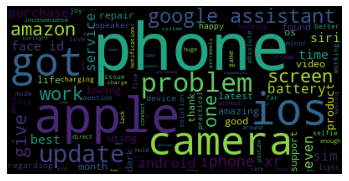

In [18]:
# WordCloud can be performed on the string inputs. That is the reason we have combined 
# entire reviews into single paragraph
# Simple word cloud


wordcloud_ip = WordCloud(
                      background_color='black',
                      max_words = 100
                     ).generate(ip_rev_string)

plt.imshow(wordcloud_ip)
plt.axis("off")
plt.show()

In [19]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
poswords = poswords[36:]


# negative words  Choose path for -ve words stored in system
with open("negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

negwords = negwords[37:]


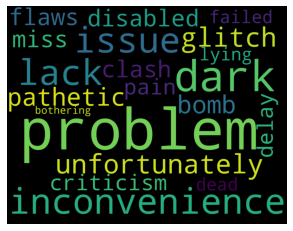

In [20]:
# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)

plt.imshow(wordcloud_neg_in_neg)
plt.axis("off")

plt.show()

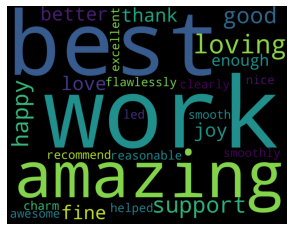

In [21]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.imshow(wordcloud_pos_in_pos)
plt.axis("off")
plt.show()

In [22]:
len(ip_pos_in_pos)

335

In [23]:
len(ip_neg_in_neg)

222

In [24]:
len(ip_reviews_words)

506

In [25]:
335/519

0.6454720616570327

In [26]:
222/519

0.4277456647398844

## Amazon Reviews

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [28]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/amazonreviews.tsv', sep='\t')
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [29]:
df['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [30]:
sid.polarity_scores(df.loc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [31]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))
df.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


In [32]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


In [ ]:
df['scores'][0]['compound']

In [33]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [34]:
df.head()

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [36]:
accuracy_score(df['label'],df['comp_score'])

0.7097

In [37]:
print(classification_report(df['label'],df['comp_score']))

              precision    recall  f1-score   support

         neg       0.86      0.52      0.64      5097
         pos       0.64      0.91      0.75      4903

    accuracy                           0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [38]:
print(confusion_matrix(df['label'],df['comp_score']))

[[2629 2468]
 [ 435 4468]]
